In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings("ignore")
import pickle
import json

# 1) Problem statement

In [ ]:
>> To classify , whether patient has diabetes or not

# 2) Data Gathering

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3) EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

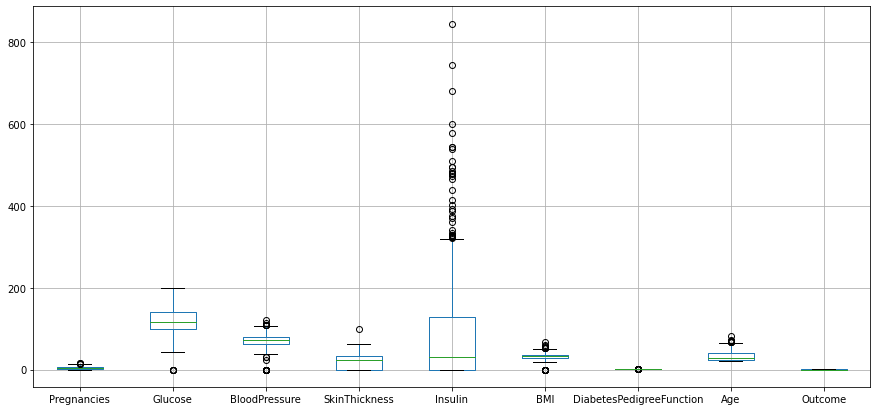

In [9]:
plt.figure(figsize=(15,7))
df.boxplot()

# 4) Feature Engineering

In [ ]:
>> as all columns are in numeric (int/float) and there is no null value present in data frame
we evaluate model on raw data
(i.e without handling outliers or without scaling)


# 5) Model training

In [10]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41,stratify=y)

y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [11]:
knn_cls = KNeighborsClassifier() # by default k = 5 , p = 2
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

# 6) Evaluation

In [13]:
# training

y_pred_train = knn_cls.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion metrix \n',cnf_matrix)
print('*'*50)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy is ',accuracy)
print("*"*50)

clf_report = classification_report(y_train,y_pred_train)
print('classification report \n\n',clf_report)

confusion metrix 
 [[356  44]
 [ 69 145]]
**************************************************
Accuracy is  0.8159609120521173
**************************************************
classification report 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86       400
           1       0.77      0.68      0.72       214

    accuracy                           0.82       614
   macro avg       0.80      0.78      0.79       614
weighted avg       0.81      0.82      0.81       614



In [12]:
# testing

y_pred_test = knn_cls.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('confusion metrix \n',cnf_matrix)
print('*'*50)

accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy is ',accuracy)
print("*"*50)

clf_report = classification_report(y_test,y_pred_test)
print('classification report \n\n',clf_report)

confusion metrix 
 [[80 20]
 [31 23]]
**************************************************
Accuracy is  0.6688311688311688
**************************************************
classification report 

               precision    recall  f1-score   support

           0       0.72      0.80      0.76       100
           1       0.53      0.43      0.47        54

    accuracy                           0.67       154
   macro avg       0.63      0.61      0.62       154
weighted avg       0.66      0.67      0.66       154



In [15]:
project_data = {'columns':list(x.columns)}

In [16]:
with open('diab_knn_data.json','w') as f:
    json.dump(project_data,f)

In [17]:
with open('diab_knn_model.pkl','wb') as f:
    pickle.dump(knn_cls,f)